# Exploratory Data Analysis Source Data

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-Source-Data" data-toc-modified-id="Exploratory-Data-Analysis-Source-Data-1">Exploratory Data Analysis Source Data</a></span><ul class="toc-item"><li><span><a href="#US-Energy-Information-Administration-(EIA)-Drilling-Productivity-Report" data-toc-modified-id="US-Energy-Information-Administration-(EIA)-Drilling-Productivity-Report-1.1">US Energy Information Administration (EIA) Drilling Productivity Report</a></span></li><li><span><a href="#Nightfire-data" data-toc-modified-id="Nightfire-data-1.2">Nightfire data</a></span></li><li><span><a href="#US-Census-Counties" data-toc-modified-id="US-Census-Counties-1.3">US Census Counties</a></span></li></ul></li></ul></div>

In [23]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [102]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [88]:
from capstone.etl.eia_retrieval import eia_retrieval
from capstone.etl.eia_parse import eia_parse_county, eia_parse_data
from tools.tools import get_current_time, read_json

In [89]:
plt.style.use('ggplot')

In [14]:
config = read_json('../config.json')

current_date = get_current_time('yyyymmdd')

wd = f"{config['workspace_directory']}/data"

## US Energy Information Administration (EIA) Drilling Productivity Report


In [16]:
eia_xls = eia_retrieval(f"{wd}/input/eia")
eia_cnty = eia_parse_county(eia_xls)
eia_data = eia_parse_data(eia_xls)  # parse the target variable(s) data

 parse eia data
    for Anadarko Region
    for Appalachia Region
    for Bakken Region
    for Eagle Ford Region
    for Haynesville Region
    for Niobrara Region
    for Permian Region


In [44]:
eia_data.head(3)

,month,natgas_mcf_d_legacy_production_change,natgas_mcf_d_production_per_rig,natgas_mcf_d_total_production,oil_bbl_d_legacy_production_change,oil_bbl_d_production_per_rig,oil_bbl_d_total_production,region,rig_count
0,2007-01-01,-112112.15,840.713208,4031234.67,-370.40457,19.309806,126398.038,Anadarko Region,176.0
1,2007-02-01,-115386.99,847.042307,4053324.71,-723.02653,20.184060,134177.221,Anadarko Region,180.0
2,2007-03-01,-118312.94,851.808491,4165395.70,-1036.83450,20.970401,137515.513,Anadarko Region,166.0


In [45]:
eia_data.columns

Index(['month', 'natgas_mcf_d_legacy_production_change',
       'natgas_mcf_d_production_per_rig', 'natgas_mcf_d_total_production',
       'oil_bbl_d_legacy_production_change', 'oil_bbl_d_production_per_rig',
       'oil_bbl_d_total_production', 'region', 'rig_count'],
      dtype='object')

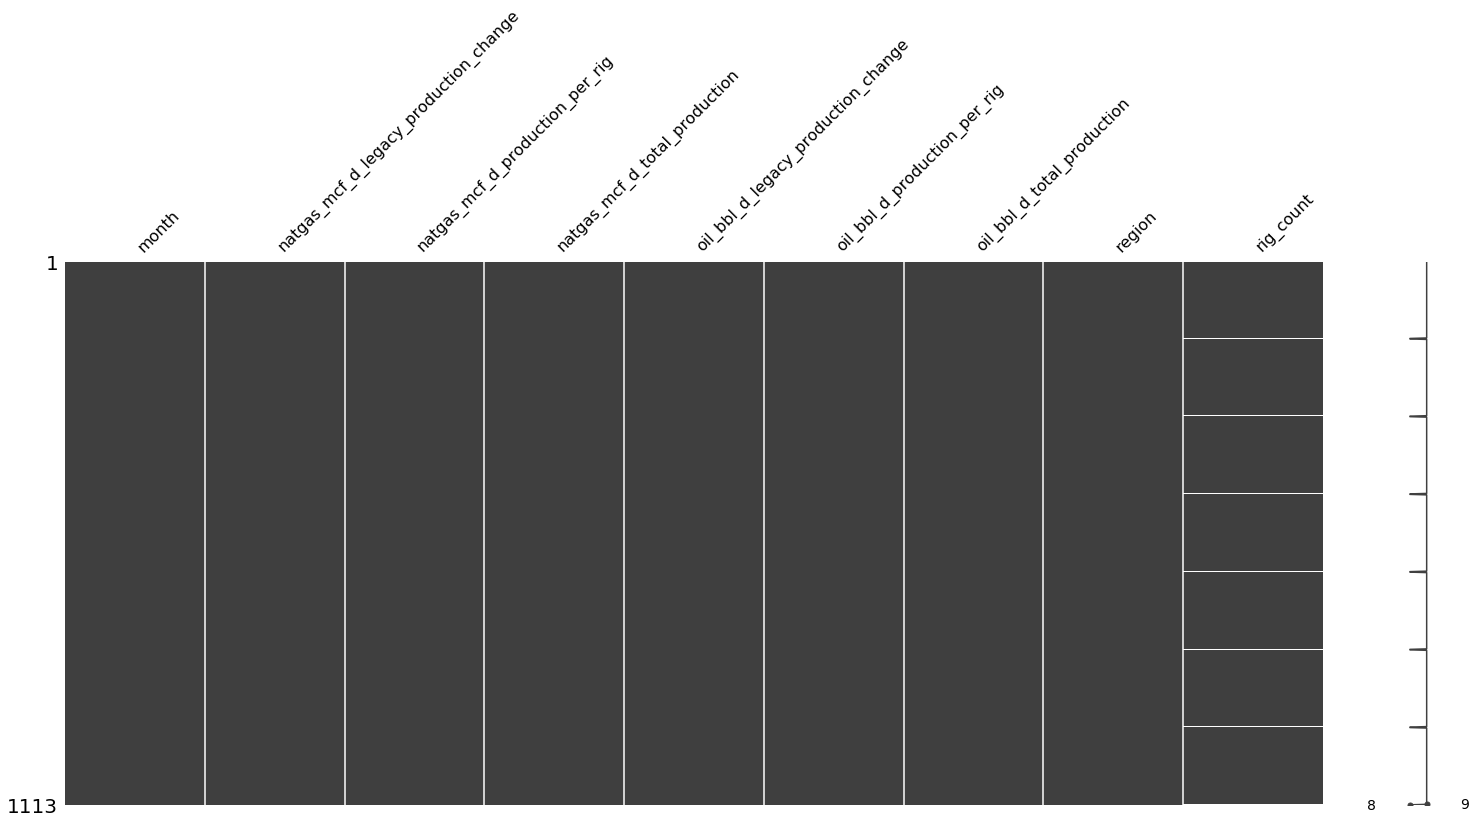

In [26]:
msno.matrix(eia_data);

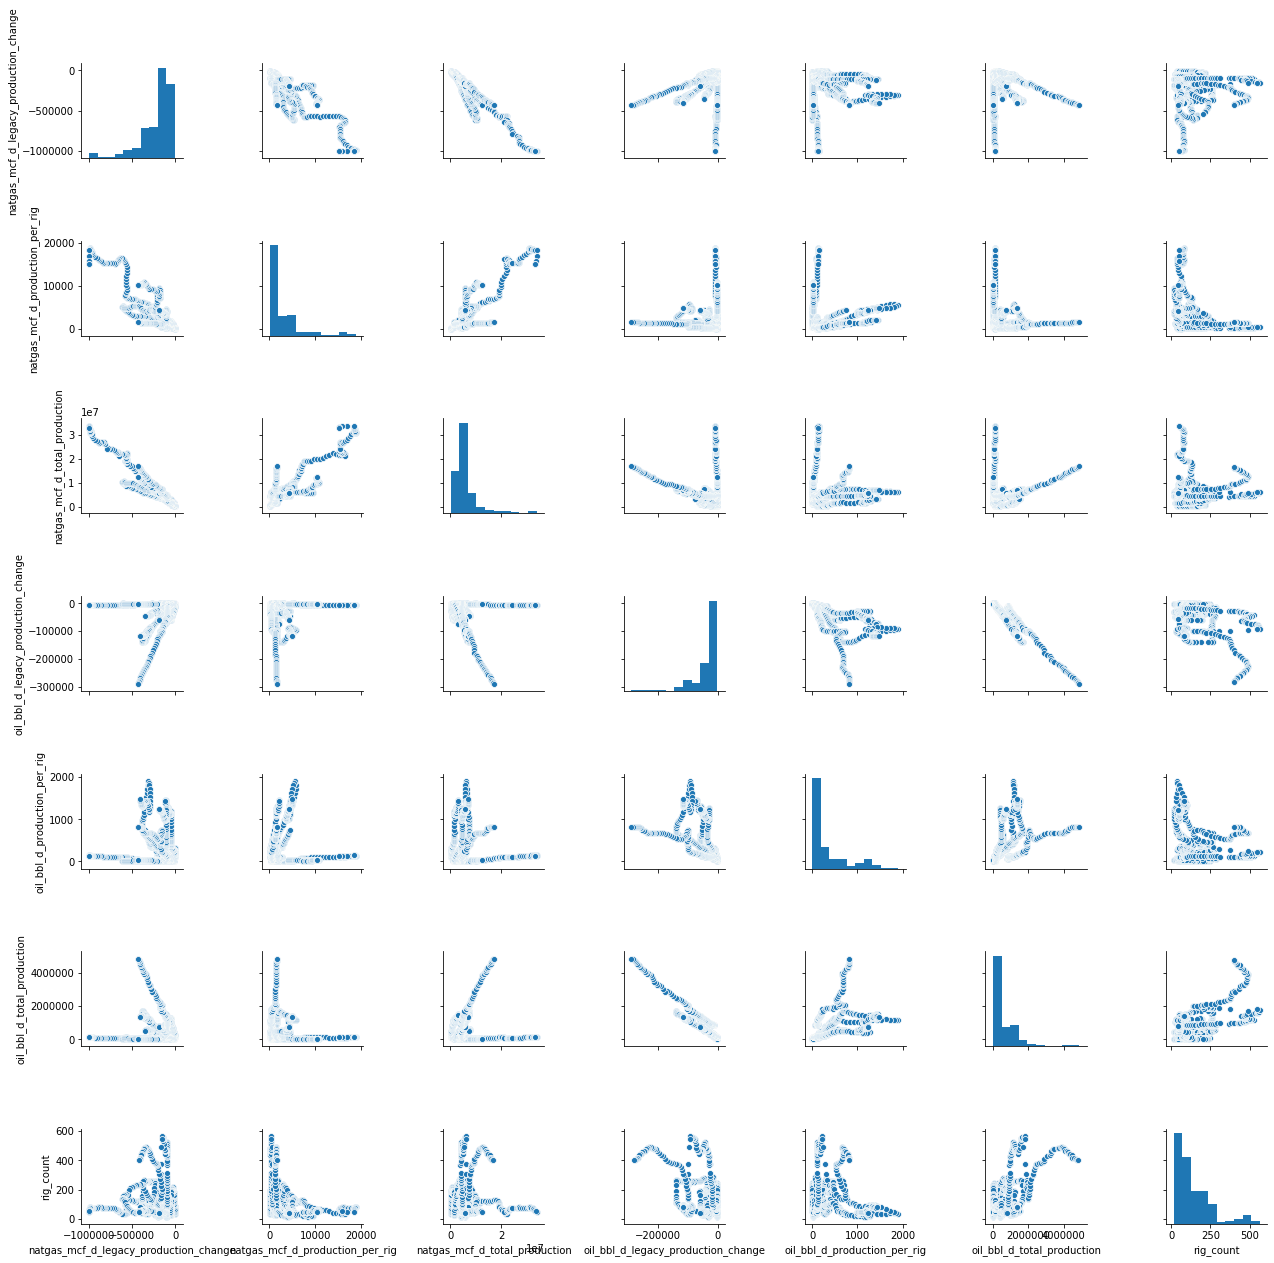

In [29]:
sns.pairplot(eia_data);  # needs to be grouped

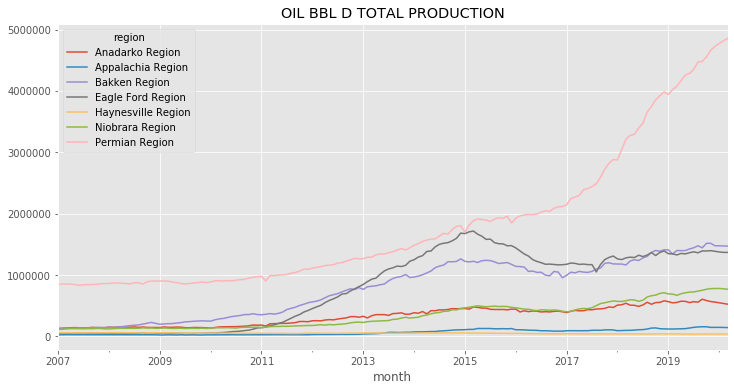

In [90]:
var = 'oil_bbl_d_total_production'
eia_data.pivot(index="month", columns="region", values=var).plot(
    figsize=(12, 6), 
    title=var.replace('_', ' ').upper(),
);

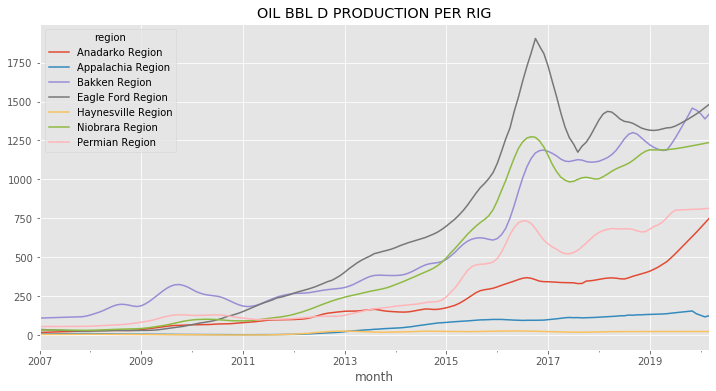

In [91]:
var = 'oil_bbl_d_production_per_rig'
eia_data.pivot(index="month", columns="region", values=var).plot(
    figsize=(12, 6), 
    title=var.replace('_', ' ').upper(),
);

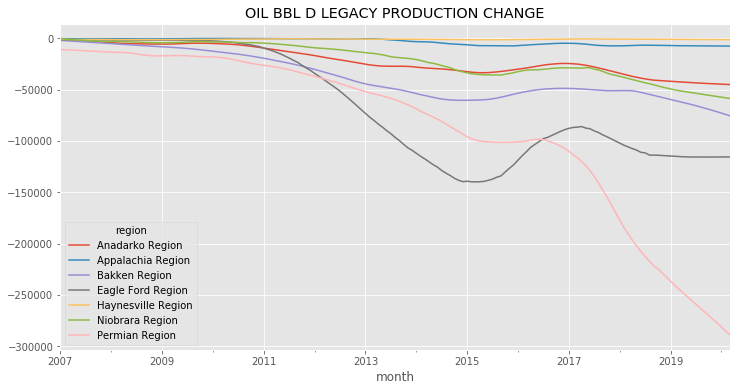

In [92]:
var = 'oil_bbl_d_legacy_production_change'
eia_data.pivot(index="month", columns="region", values=var).plot(
    figsize=(12, 6), 
    title=var.replace('_', ' ').upper(),
);

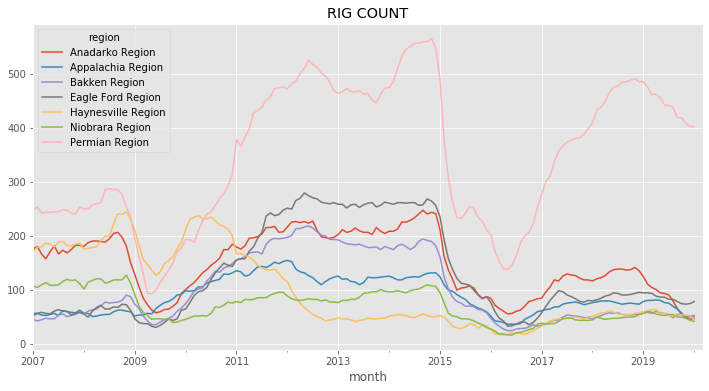

In [93]:
var = 'rig_count'
eia_data.pivot(index="month", columns="region", values=var).plot(
    figsize=(12, 6), 
    title=var.replace('_', ' ').upper(),
);

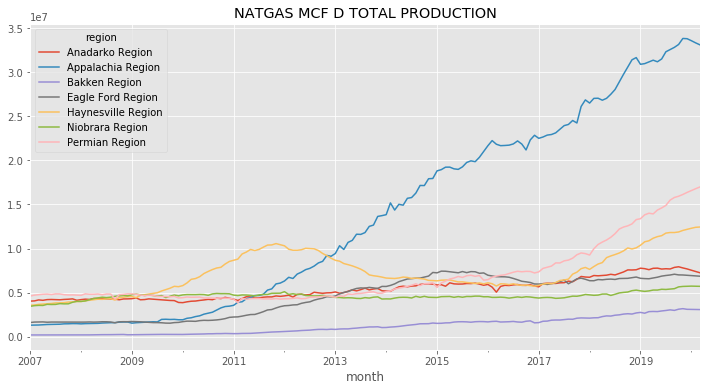

In [94]:
var = 'natgas_mcf_d_total_production'
eia_data.pivot(index="month", columns="region", values=var).plot(
    figsize=(12, 6), 
    title=var.replace('_', ' ').upper(),
);

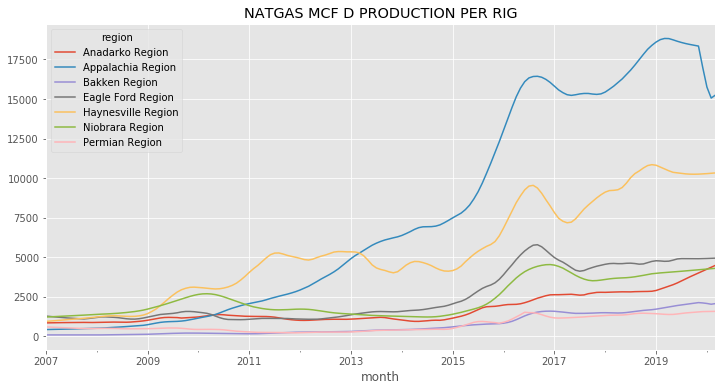

In [95]:
var = 'natgas_mcf_d_production_per_rig'
eia_data.pivot(index="month", columns="region", values=var).plot(
    figsize=(12, 6), 
    title=var.replace('_', ' ').upper(),
);

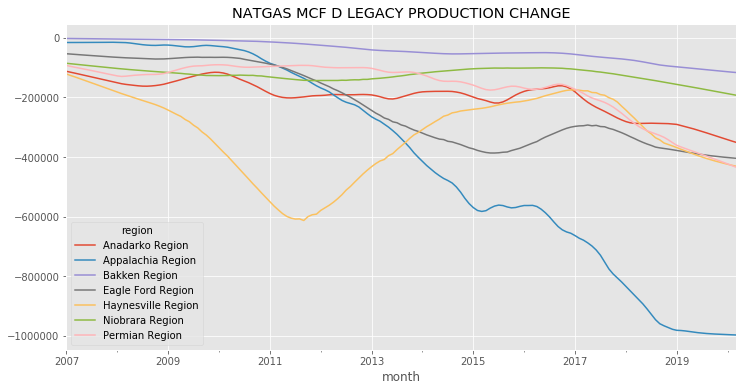

In [96]:
var = 'natgas_mcf_d_legacy_production_change'
eia_data.pivot(index="month", columns="region", values=var).plot(
    figsize=(12, 6), 
    title=var.replace('_', ' ').upper(),
);

## Nightfire data


## US Census Counties

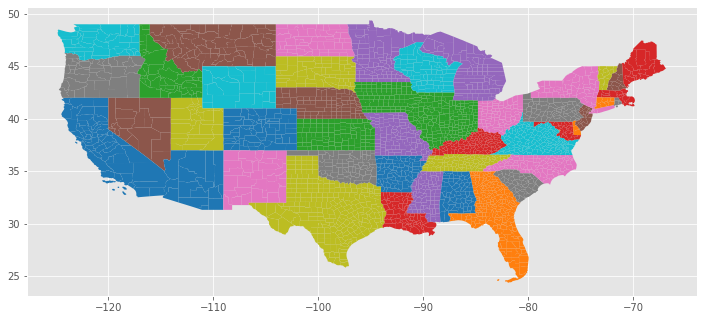

In [140]:
census = gpd.read_file('../data/input/census/tl_2017_us_county.shp')

census.columns = [c.lower() for c in census.columns]

census = census[
    (census['statefp'] != '66') & (census['statefp'] != '78') & (census['statefp'] != '69') & (census['statefp'] != '60') & (census['statefp'] != '02') & (census['statefp'] != '15') & (census['statefp'] != '72')
]  # drop alaska and hawaii and island territories 

census.plot(figsize=(12, 6), column='statefp');

In [116]:
census.groupby(['statefp'])['statefp'].count().sort_values()

statefp
11      1
66      1
78      3
10      3
69      4
44      5
15      5
60      5
09      8
33     10
25     14
50     14
04     15
23     16
32     17
34     21
56     23
24     24
49     29
02     29
35     33
41     36
53     39
16     44
45     46
38     53
54     55
30     56
06     58
36     62
08     64
22     64
46     66
42     67
01     67
12     67
55     72
05     75
40     77
72     78
28     82
26     83
27     87
39     88
18     92
31     93
47     95
19     99
37    100
17    102
20    105
29    115
21    120
51    133
13    159
48    254
Name: statefp, dtype: int64

In [111]:
census

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477641638,10701538,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956787,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016761648,29147345,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169252486,22867561,+40.7835474,-096.6886584,"POLYGON ((-96.91060 40.95841, -96.91060 40.958..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645186,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103942496,12227724,+34.6905055,-084.4546244,"POLYGON ((-84.65478 34.66559, -84.65488 34.669..."
3229,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329471930,16913419,+48.7610683,-095.8215042,"POLYGON ((-96.40466 48.80528, -96.40467 48.813..."
3230,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1850209209,71667634,+32.6343703,-090.0341603,"POLYGON ((-90.09363 32.70763, -90.09360 32.707..."
3231,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333039139,8841781,+32.3034712,-101.4387720,"POLYGON ((-101.69227 32.27106, -101.69221 32.2..."
